# Agoda Case

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Confirm working directory is same as folder location where files are saved
#pwd

# Ingest Data

In [4]:
# Read in given Datasets
cityA = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_A')
cityB = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_B')
cityC = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_C')
cityD = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_D')
cityE = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_E')

In [5]:
# Create Merged Dataset (All Cities)
datasets = [cityA,cityB,cityC,cityD,cityE]
all_cities = pd.concat(datasets,ignore_index=True)
datasets.append(all_cities)

## Clean Data

In [6]:
#Check for errors and data completeness
def check_data_completeness(df):
    a = "Null values: {}".format(sum(df.isnull().sum()))
    b = "NA values: {}".format(sum(df.isna().sum()))                                 
    c= "Lenght of dataframe: Rows {}, Columns {}".format(len(df),len(df.columns))
    return a,b,c

In [7]:
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22366, Columns 10')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 10')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 10')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 10')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4817, Columns 10')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49064, Columns 10')


In [8]:
all_cities['hotel_id'].nunique()

880

# Create Extra Data

## New Columns in Dataset
- 'days_before_checkin' = Days before customer checked in to accomodation
- 'days_booked'         = No of Days customer stayed in accomodation
- 'total_revenue'       = Total Revenue per Booking

## New Dataset Table
- 'bookings'            = Cumulative Sum of Bookings
- 'percentage'          = Cumulative Percentage of Bookings

In [9]:
def create_extra_data(df):
    df['days_before_checkin'] = (df['checkin_date'] - df['booking_date']).dt.days
    df['days_booked'] = (df['checkout_date'] - df['checkin_date']).dt.days
    df['total_revenue'] = df['ADR_USD']*df['days_booked']
    df.drop(df[df['days_before_checkin']<0].index, inplace = True)
    
    return df


def calc_cum_bookings(df):
    # Group Dataframe by number of days before customer checkin date
    df_cum_bookings = df.groupby('days_before_checkin').count().reset_index()
    # Subselect Segement of Dataframe
    df_cum_bookings = df_cum_bookings[['days_before_checkin','ADR_USD']]
    # Rename Column Headers
    df_cum_bookings.columns = ['days_before_checkin', 'bookings']
    #Calculate Cumulative Bookings
    df_cum_bookings['percentage']=(100*df_cum_bookings['bookings']/df_cum_bookings['bookings'].sum())[::-1].cumsum()
    df = df_cum_bookings
    return df

# Other Updates to possibly add to Code
# - Return no of rows removed/percentage of rows removed

In [10]:
# Format Datasets
for df in datasets:
        create_extra_data(df)

In [11]:
# Check Data Integrity
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


In [13]:
# Create new Datasets with cumulative booking data
cityA_cum = calc_cum_bookings(cityA)
cityB_cum = calc_cum_bookings(cityB)
cityC_cum = calc_cum_bookings(cityC)
cityD_cum = calc_cum_bookings(cityD)
cityE_cum = calc_cum_bookings(cityE)
all_cities_cum = calc_cum_bookings(all_cities)


In [14]:
datasets_cum = [cityA_cum,cityB_cum,cityC_cum,cityD_cum,cityE_cum,all_cities_cum]

# 

# Exploratory Data Analysis

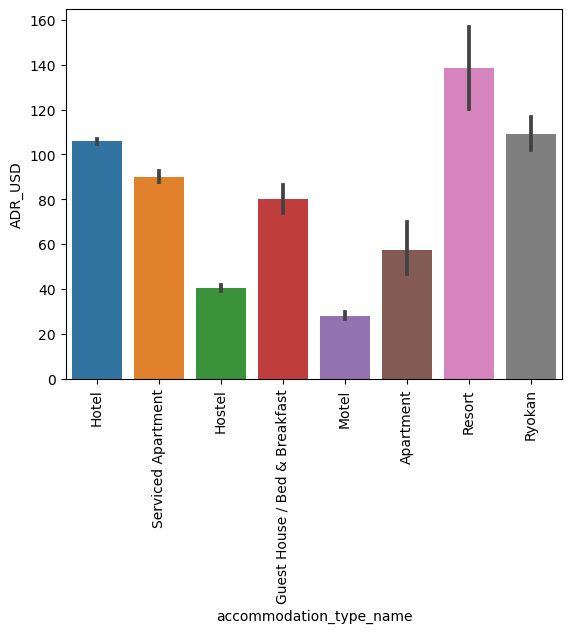

In [15]:
#plt.figure(dpi=200,figsize=(12,4))
sns.barplot(data=cityA,x='accommodation_type_name',y='ADR_USD')

plt.xticks(rotation=90)
plt.show;

## City Statistics

Median Days Booked

In [16]:
all_cities['days_before_checkin'].median()

8.0

In [17]:
# Average ADR
all_cities['ADR_USD'].mean()

148.0930176823937

In [18]:
all_cities['total_revenue'].sum()

12552312.923595235

## Visualisations

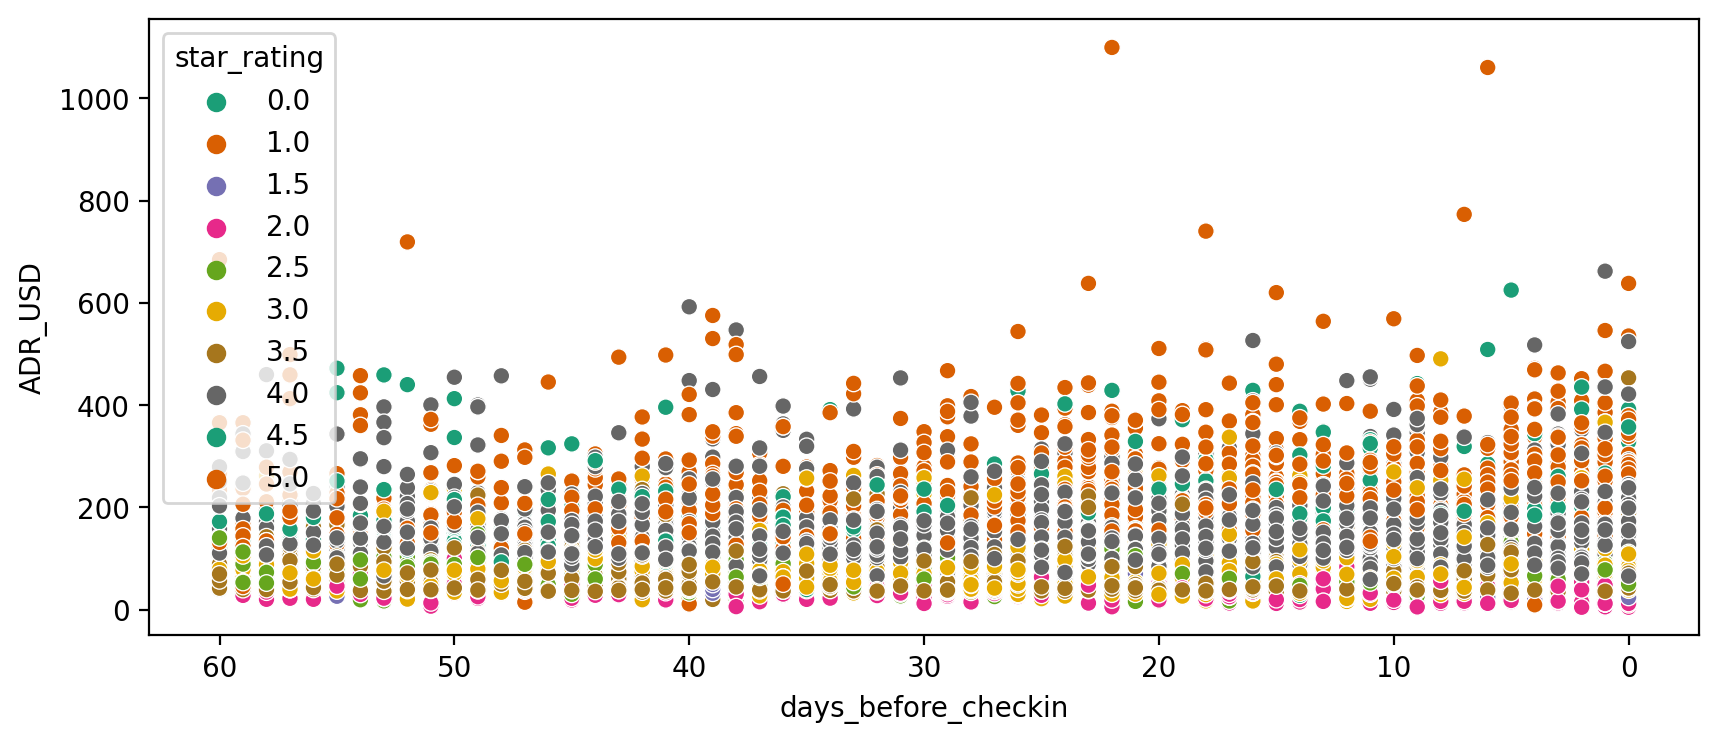

In [19]:
plt.figure(dpi=200,figsize=(10,4))

sns.scatterplot(data=cityA,y=cityA['ADR_USD'],x=(cityA['days_before_checkin']),hue='star_rating',palette = 'Dark2')

plt.gca().invert_xaxis()
plt.show();

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

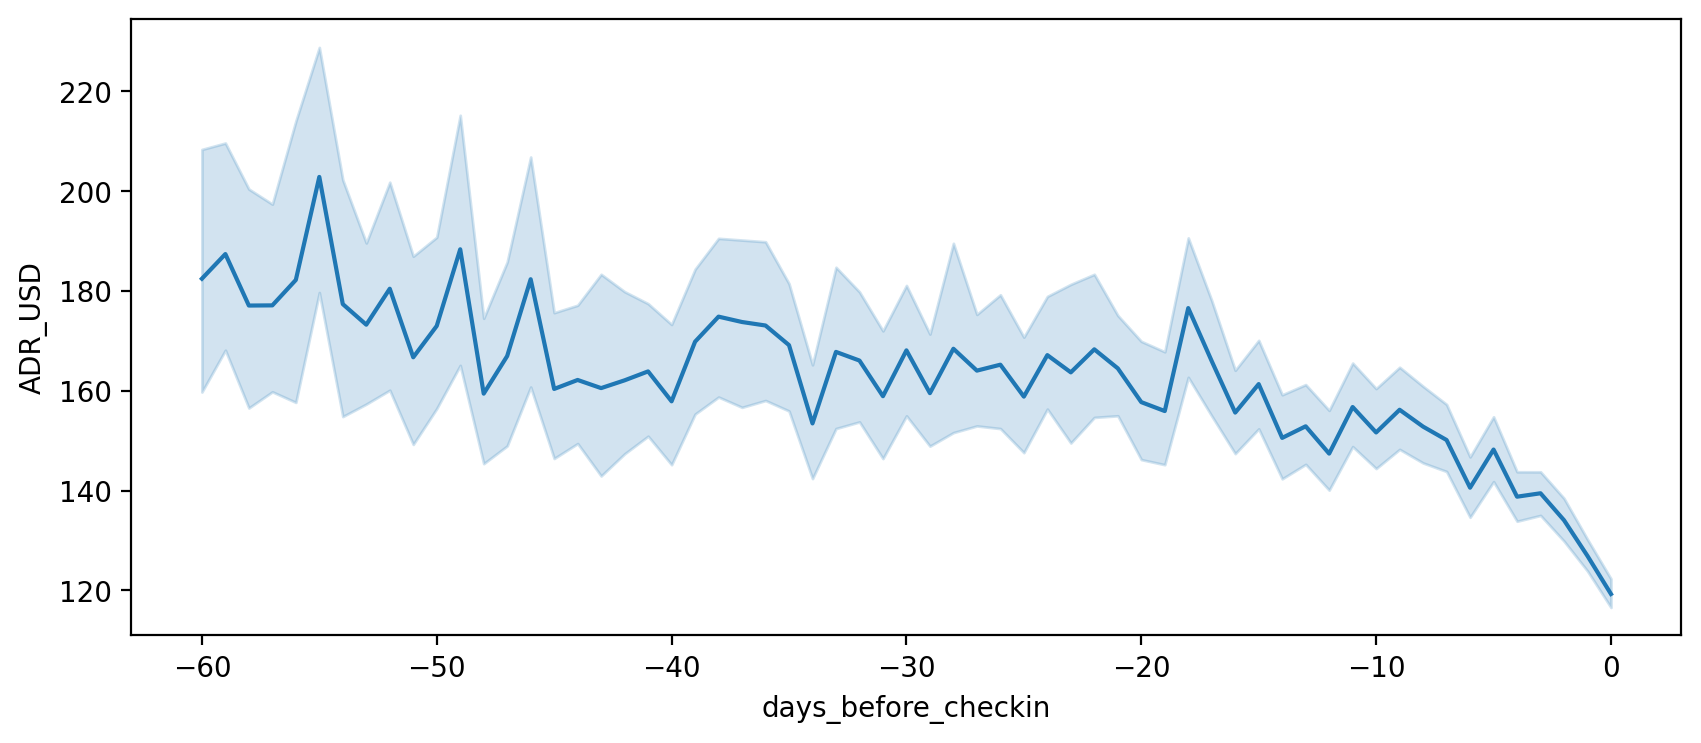

In [20]:
plt.figure(dpi=200,figsize=(10,4))

#sns.lineplot(data=cityA,x=cityA['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityB,x=cityB['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityC,x=cityC['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityD,x=cityD['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityE,x=cityE['days_before_checkin']*(-1),y='ADR_USD')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin']*(-1),y='ADR_USD')

#plt.labels()

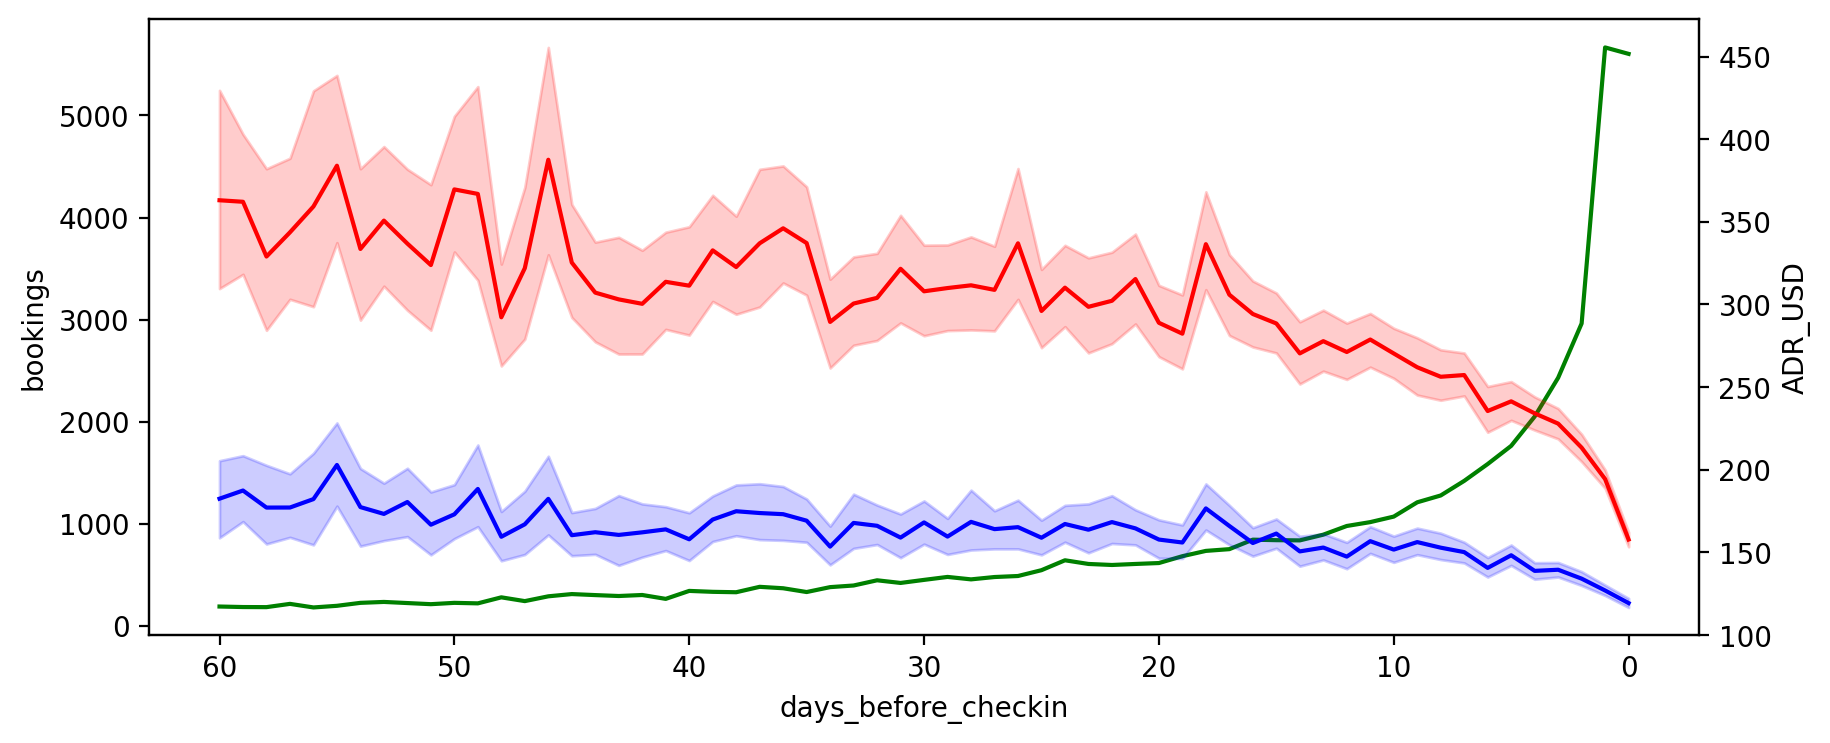

In [21]:
#plt.figure(dpi=200,figsize=(12,4))
fig, ax = plt.subplots(dpi=200,figsize=(10,4))
ax2 = ax.twinx()

#ax.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='black')


sns.lineplot(data = all_cities_cum, x= all_cities_cum['days_before_checkin'],y='bookings',ax=ax,color='green')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='ADR_USD',ax=ax2,color='blue')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='total_revenue',ax=ax2,color='red')


plt.gca().invert_xaxis()
plt.show();

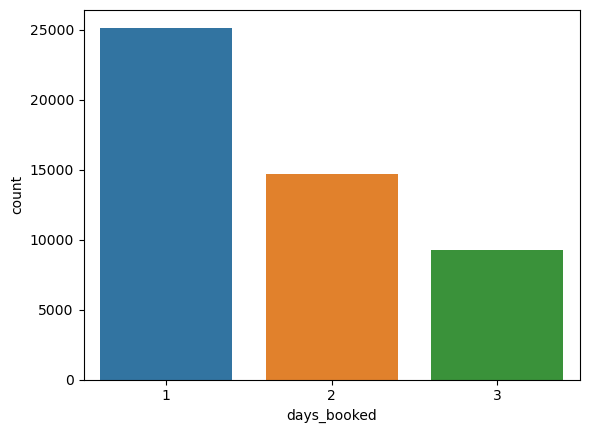

In [22]:
#plt.figure(dpi=200,figsize=(12,4))
sns.countplot(data=all_cities,x='days_booked')
#plt.xticks(rotation=90)
plt.show;

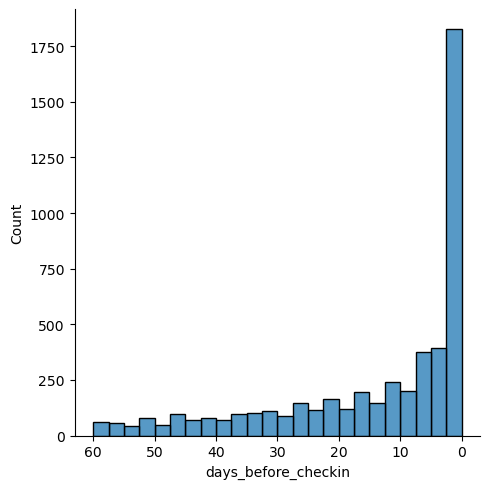

In [23]:
sns.displot(data=cityB,x='days_before_checkin')
plt.gca().invert_xaxis()

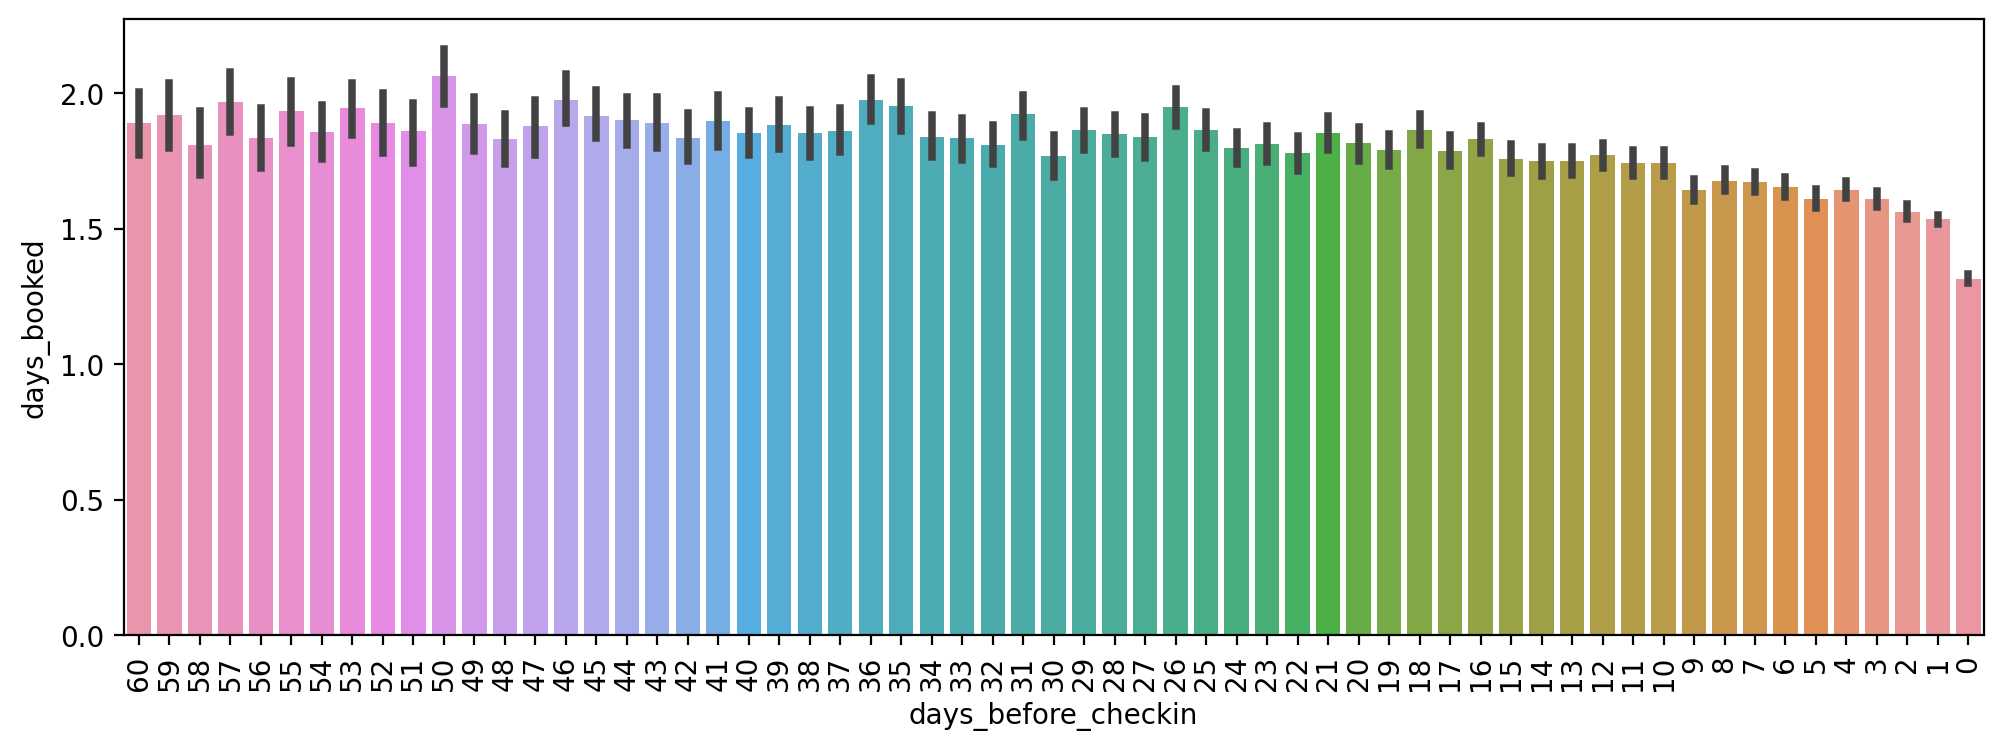

In [24]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='days_booked',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

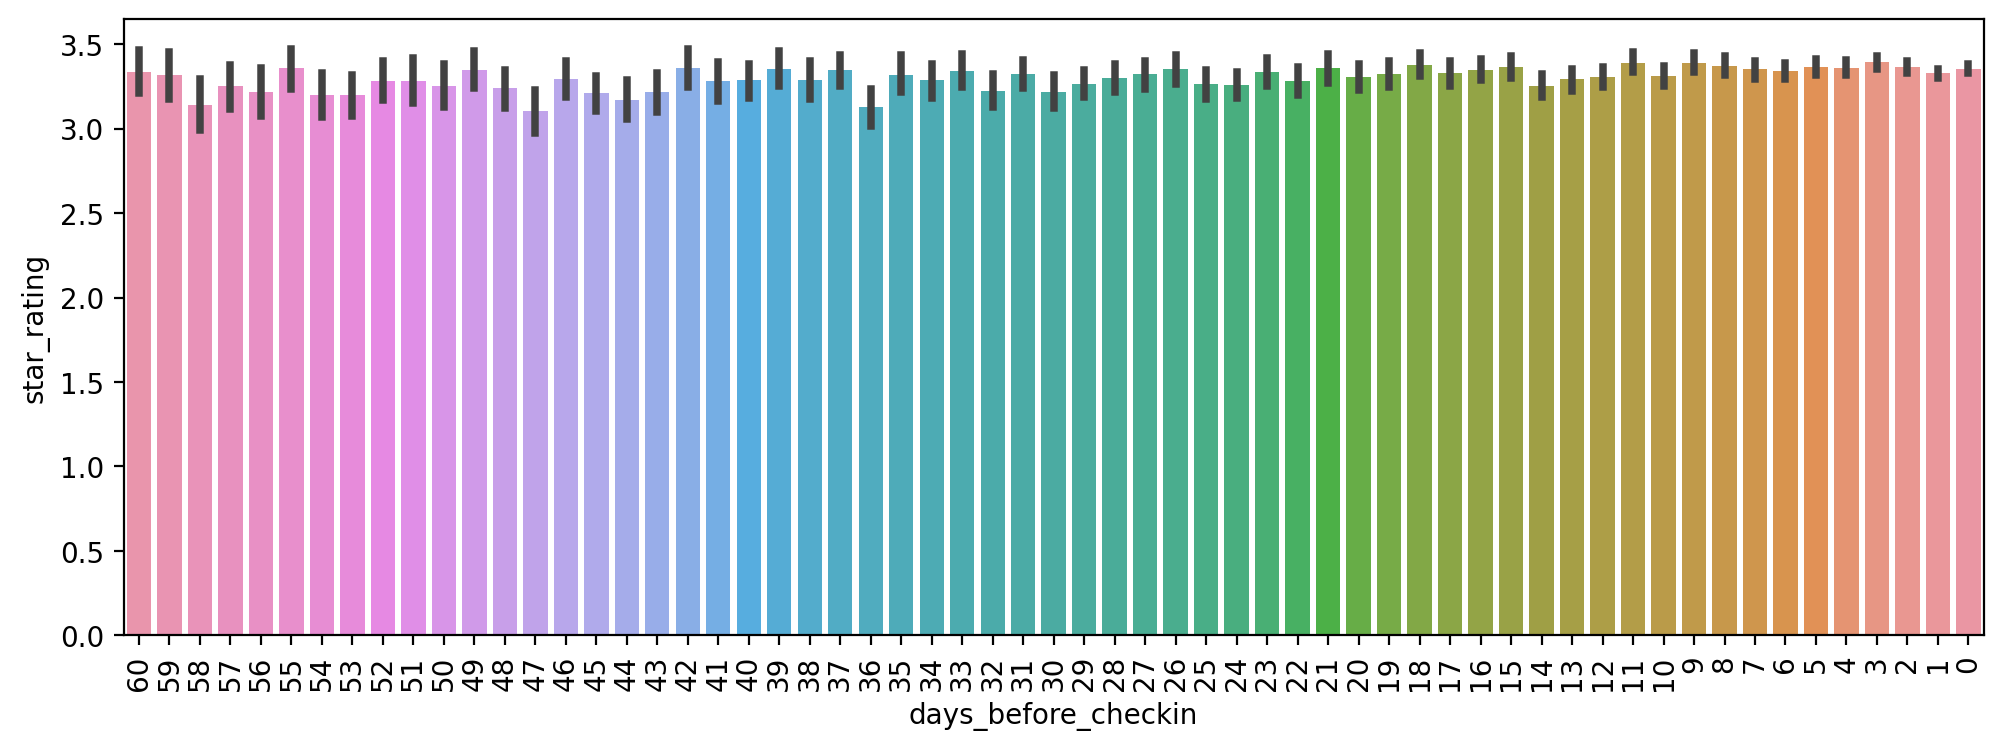

In [25]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='star_rating',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

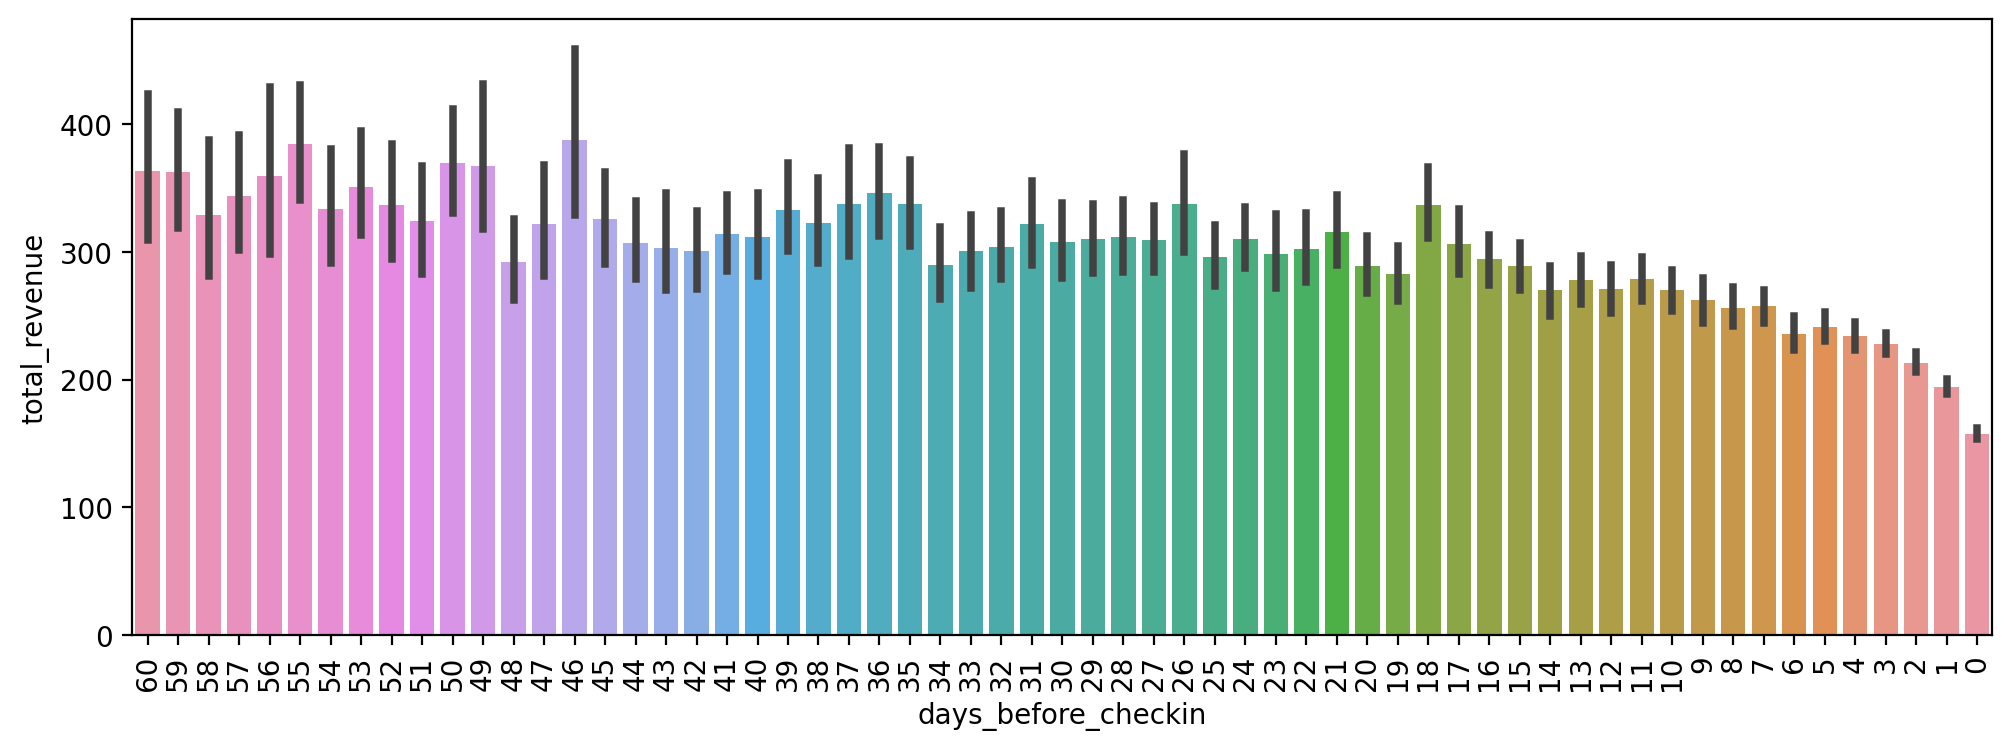

In [26]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='total_revenue',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

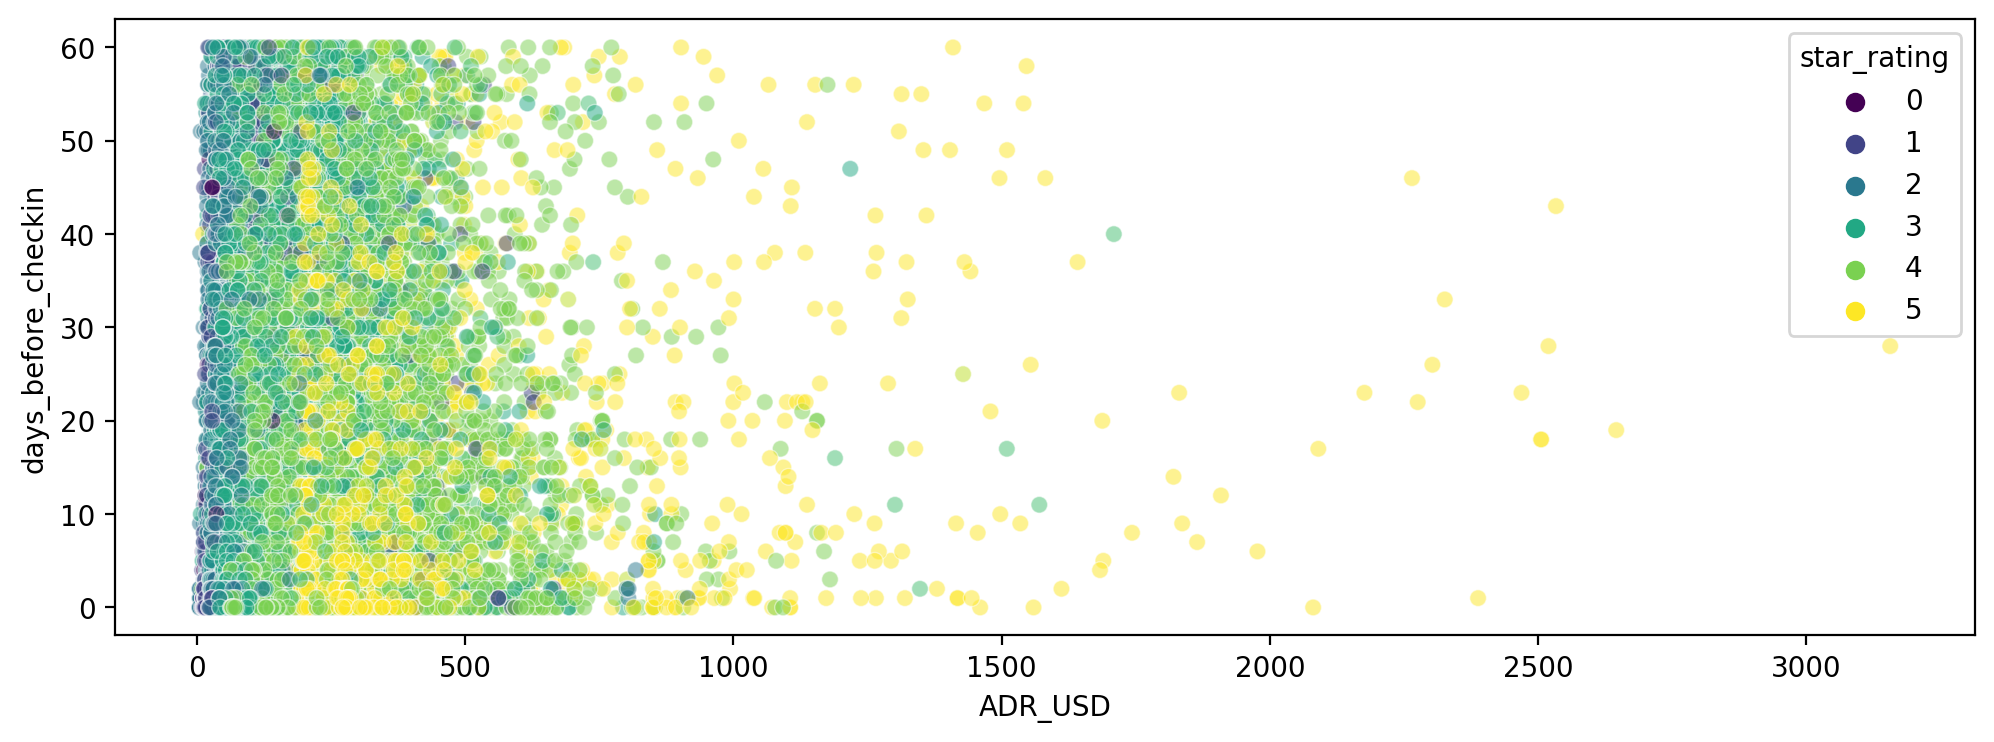

In [29]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='star_rating',
                palette = 'viridis',alpha=0.5)

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

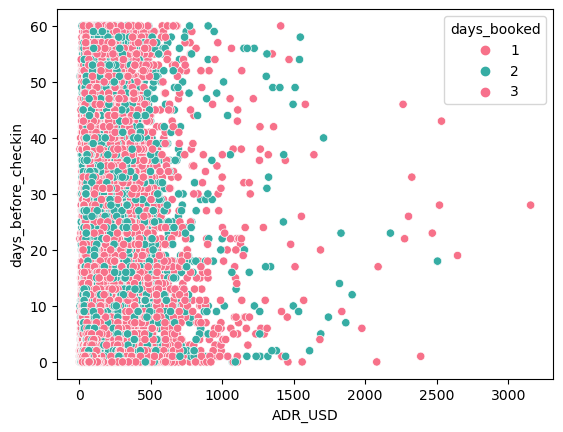

In [28]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='days_booked',
                palette = 'husl')

### Mostly resorts are booked late

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

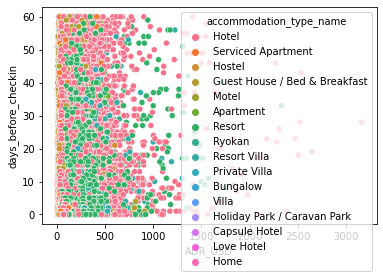

In [1061]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='accommodation_type_name',
                palette = 'husl')

In [1062]:
#all_cities['accommodation_type_name'].value_counts()

In [257]:
options = ['Bungalow','Ryokan','Motel','Private Villa','Home','Holiday Park / Caravan Park','Love Hotel','Villa']
#dfall[(dfall['accommodation_type_name'] == 'Bungalow' | 'Motel')]

## WHAT IS THE PERCENTAGE OF DATA I AM REMOVING???????????????????????????????????????????

In [258]:
#all_cities[~all_cities['accommodation_type_name'].isin(options)]

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

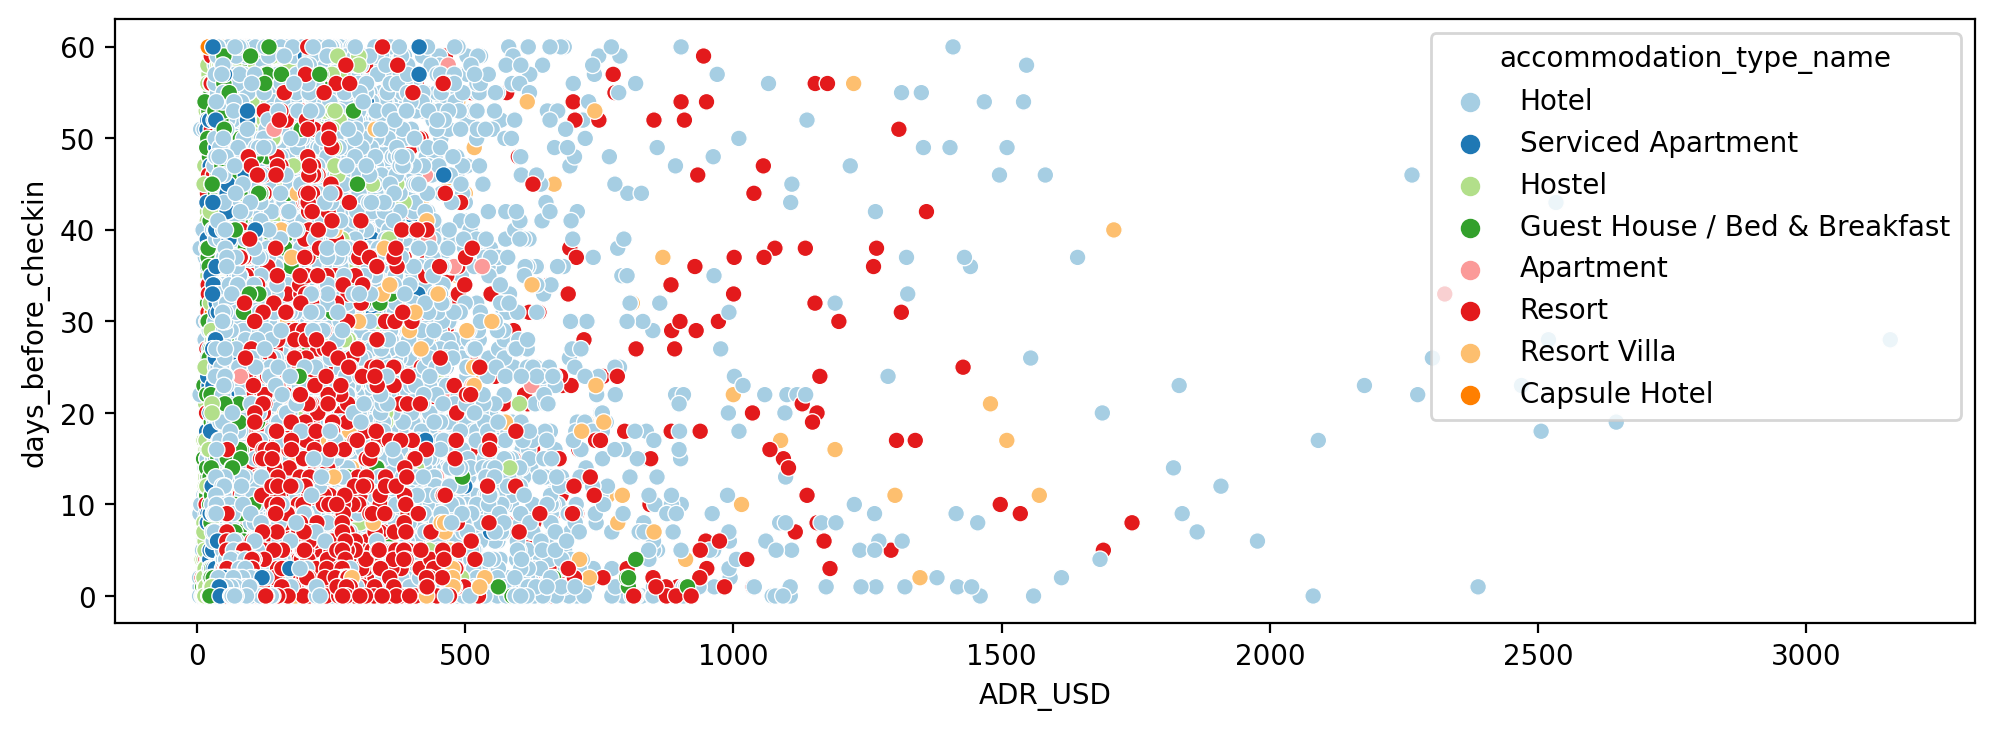

In [259]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities[~all_cities['accommodation_type_name'].isin(options)],hue='accommodation_type_name',
                palette = 'Paired')

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

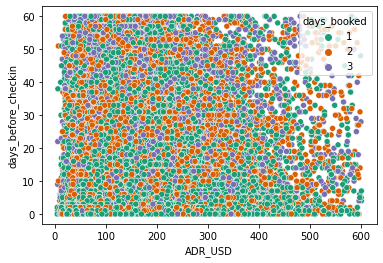

In [1070]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities[all_cities['ADR_USD']<601],hue='days_booked',
                palette = 'Dark2')

### List to crosscheck days_before_checkin looked at against al available criteria
- ADR_USD - relevant
- city_id - not statistically relevant
- hotel_id - ignore
- star_rating - not statistically relevant
- accommodation_type_name - relevant
- chain_hotel - relevant
- booking_date - ignore
- checkin_date - ignore
- checkout_date - ignore
- days_booked - relevant
- total_revenue - relevant


# FINDINGS

# 1 - what percentage of 1 day bookers book last 10 days?

In [1078]:
all_cities[all_cities['days_before_checkin']<11]['days_booked'].value_counts()

1    16040
2     7232
3     3764
Name: days_booked, dtype: int64

## 2 - 40% are yet to book 1 week to check in date

In [1080]:
all_cities_cum['percentage'][:10]

0    100.000000
1     88.579523
2     77.030635
3     70.993253
4     66.040236
5     61.861764
6     58.268278
7     55.037606
8     52.143250
9     49.540368
Name: percentage, dtype: float64

3rd point about revenue?

In [568]:
# ADD calculations revenue

In [260]:
all_cities.head(2)

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checkin,days_booked,total_revenue
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,71.06
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,76.56


### 4 - Mostly resorts are booked late

In [266]:
(all_cities[all_cities['days_before_checkin']<11])#.groupby('accommodation_type_name').sum()

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checkin,days_booked,total_revenue
1496,1497,78.460000,297388,9395,2.5,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,78.46
1498,1499,65.820000,601910,9395,3.5,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,65.82
1504,1505,106.040000,21272,9395,4.0,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-04,10,3,318.12
1506,1507,114.240000,21272,9395,4.0,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,114.24
1527,1528,70.220000,601910,9395,3.5,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,70.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49056,4813,72.580000,130890,8584,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0,2,145.16
49057,4814,70.020000,130890,8584,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,70.02
49058,4815,921.260000,21720,8584,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,921.26
49059,4816,345.086667,21720,8584,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-03,0,3,1035.26


In [233]:
all_citiesx['hotel_id'].nunique()

880

In [278]:
all_cities['star_rating'].value_counts()

3.0    14798
4.0    14487
3.5     6295
5.0     4080
1.0     3397
2.0     2343
2.5     1929
4.5     1100
1.5      461
0.0      171
Name: star_rating, dtype: int64

In [279]:
(all_cities[all_cities['days_before_checkin']<3])['star_rating'].value_counts()

4.0    4679
3.0    3981
3.5    1571
5.0    1228
1.0     904
2.0     878
2.5     559
4.5     243
1.5     111
0.0      77
Name: star_rating, dtype: int64

In [ ]:
.groupby('accommodation_type_name').sum()

Above, try to segment /  calculate percentage of bookings per time period based on a)accomodation type b)hotel chain c)city 

# 

#  

# 

#  Predicting Price

Order of Items:
- Import Modules
- ML Data Prep
- Price prediction with various models:
    - a) Linear Regression
    - b) Random Forest Regressor
    - c) Linear Regression
    - e) Neural Network
    - f) SVR
    - g) Gaussian Regressor   *postponed
    - h) Polynomial Regressor *postponed
- Model Selection
- Model Tuning
- Performance Evaluation

In [1153]:
#IMPORT MODELS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR,LinearSVR

#IMPORT DATA PROCESSORS
from sklearn.preprocessing import tests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#IMPORT PERF METRICS
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pickle

# 

Data Preparation

In [477]:
#Drop redundant columns
all_citiesx = all_cities.drop(['booking_date','checkin_date','checkout_date','total_revenue','#'],axis=1)#.drop()

In [478]:
#Get Dummy Variables for categorical columns - accommodation_type_name & chain_hotel
df1 = pd.get_dummies(all_citiesx['accommodation_type_name'])
all_citiesx = pd.concat([all_citiesx, df1], axis=1).reindex(df.index)
all_citiesx.drop('accommodation_type_name', axis=1, inplace=True)

df1 = pd.get_dummies(all_citiesx['chain_hotel'])
all_citiesx = pd.concat([all_citiesx, df1], axis=1).reindex(df.index)
all_citiesx.drop('chain_hotel', axis=1, inplace=True)

In [479]:
# Check for multicollinearity after adding dummy variables
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=True, inplace=False)

calculate_vif(X).transpose()

C:\Users\User\AppData\Local\Temp\ipykernel_48876\2639837437.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\2639837437.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\2639837437.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\2639837437.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\2639837437.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\2639837437.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\i

,4,3,1,0,2,20,19,18,17,16,...,11,21,10,9,8,7,6,5,12,22
Var,days_booked,days_before_checkin,city_id,hotel_id,star_rating,Villa,Serviced Apartment,Ryokan,Resort Villa,Resort,...,Hostel,chain,Home,Holiday Park / Caravan Park,Guest House / Bed & Breakfast,Capsule Hotel,Bungalow,Apartment,Hotel,non-chain
Vif,1.04,1.05,1.15,1.18,1.92,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [328]:
# Split data into train and test split
X = all_citiesx.drop('ADR_USD',axis=1)
y = all_citiesx['ADR_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [329]:
def calc_model_accuracy(ypreds,y_test):
    a = mean_absolute_error(ypreds,y_test)
    b = np.sqrt(mean_squared_error(ypreds,y_test))
    return "MAE: {}, RMSE: {}".format(round(a,2),round(b,2))

# 

Linear Regression

In [355]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)
ypreds = lmodel.predict(X_test)
calc_model_accuracy(ypreds,y_test)

'MAE: 74.62, RMSE: 117.33'

##### 

Elastic Net

In [345]:
elasmodel = ElasticNet(random_state = 18)
elasmodel.fit(X_train,y_train)
ypreds = elasmodel.predict(X_test)
calc_model_accuracy(ypreds,y_test)

'MAE: 76.42, RMSE: 120.17'

##### 

Random Forest

In [334]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train,y_train)
ypreds = rf.predict(X_test)
calc_model_accuracy(ypreds,y_test)

'MAE: 53.44, RMSE: 87.81'

##### 

Random Forest - Hyperparameter Search

In [211]:
forest_params = [{'max_depth': list(range(10, 15)) , 'n_estimators': [100, 150, 200, 250, 300] }]
clf = GridSearchCV(rf, forest_params, cv = 10)
best_clf = clf.fit(X_train,y_train)

In [1067]:
best_clf.best_estimator_

RandomForestRegressor(max_depth=11, n_estimators=300)

##### 

Random Forest - Estimators: 300, Max_Depth: 17

In [340]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 17, random_state = 18)
rf.fit(X_train,y_train)
ypreds = rf.predict(X_test)
calc_model_accuracy(ypreds,y_test)

'MAE: 37.44, RMSE: 69.41'

In [1068]:
pd.DataFrame(all_citiesx.columns[1:],rf.feature_importances_*100).transpose()

,31.699744,19.898739,20.950628,13.826401,2.172836,0.138454,0.020906,0.339772,0.436332,0.000273,...,0.006553,0.004460,0.106822,1.736276,0.972466,0.284416,0.431559,0.000186,2.466271,2.087196
0,hotel_id,city_id,star_rating,days_before_checkin,days_booked,Apartment,Bungalow,Capsule Hotel,Guest House / Bed & Breakfast,Holiday Park / Caravan Park,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain


##### 

Neural Network

In [344]:
regr = MLPRegressor(random_state=18).fit(X_train, y_train)
ypreds = regr.predict(X_test)
calc_model_accuracy(ypreds,y_test)

'MAE: 138.36, RMSE: 198.84'

##### 

Gaussian Process Regressor

In [ ]:
# GaussianProcessRegressor
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
#X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
#kernel = DotProduct() + WhiteKernel() #/ RBF / The Exponential Sine Squared Kernel
#gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y)

##### 

SVR

In [352]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
base_model = SVR()
base_model.fit(scaled_X_train,y_train)
base_preds = base_model.predict(scaled_X_test)
calc_model_accuracy(base_preds,y_test)

'MAE: 60.27, RMSE: 114.88'

##### 

SVR kernel 'linear'

In [353]:
linearsvr = SVR(kernel='linear', degree=3,C=0.01)
linearsvr.fit(scaled_X_train,y_train)
linearpreds = linearsvr.predict(scaled_X_test)
calc_model_accuracy(linearpreds,y_test)

'MAE: 69.42, RMSE: 123.82'

##### 

SVR kernel 'poly'

In [356]:
poly_model = SVR(kernel='poly',degree=4,C=0.01)
poly_model.fit(scaled_X_train,y_train)
poly_preds = poly_model.predict(scaled_X_test)
calc_model_accuracy(poly_preds,y_test)

'MAE: 79.69, RMSE: 132.66'

# 

SVR GridSearch

In [128]:
gamma - higher, overfits to data, auto = 0.5
kernal - shape of 'line' that captures data points
degree - of polynomial?
epsilon - 
C - regularization paramet, smaller c, more points outside capture area
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [130]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)
#grid.fit(scaled_X_train,y_train)
grid.best_params_

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
calc_model_accuracy(poly_preds,y_test)

# 

Error Toggle Button

In [1]:
from IPython.display import HTML
HTML('''<script>code_show_err=false;function code_toggle_err() {if (code_show_err){$('div.output_stderr').hide();
 } else {$('div.output_stderr').show();} code_show_err = !code_show_err} $( document ).ready(code_toggle_err);
</script> To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

# 

# PREDICTION

In [1076]:
# Create model (without accommodation_type_name variable)

df = all_cities.drop(['booking_date','checkin_date','checkout_date','total_revenue','#','accommodation_type_name'],axis=1)#.drop()
# Split data into train and test split
df2 = pd.get_dummies(df['chain_hotel'])
df = pd.concat([df, df2], axis=1).reindex(df.index)
df.drop('chain_hotel', axis=1, inplace=True)

X = df.drop('ADR_USD',axis=1)
y = df['ADR_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

rfmodel = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 17, random_state = 18)
rfmodel.fit(X_train,y_train)
ypreds = rfmodel.predict(X_test)
calc_model_accuracy(ypreds,y_test)

'MAE: 38.86, RMSE: 76.04'

In [1154]:
pickle.dump(rfmodel, open('ML model.pkl', 'wb'))

In [1545]:
def get_dummies(df):
    df = df.drop(['booking_date','checkin_date','checkout_date','total_revenue','#','accommodation_type_name'],axis=1)
    df2 = pd.get_dummies(df['chain_hotel'])
    df = pd.concat([df, df2], axis=1).reindex(df.index)
    df.drop('chain_hotel', axis=1, inplace=True)
    return df

## 

In [1550]:
# https://www.cnbc.com/2022/05/18/exactly-when-to-book-a-hotel-to-get-the-best-deal.html -> 15 days

def calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier):
    global df
    # Select subsection of dataframe to Predict Prices On #Last day '0' counted as a check-in date
    bookings = all_cities[all_cities['days_before_checkin']<days_before_checkin] 

    # Estimate portion that would respond to urgency message & shuffle the DataFrame rows
    bookings = bookings.sample(frac = fraction_responded)

    # Create Dataframe and Increase Days by no_of_days
    bookings_day = bookings.copy()
    bookings_day['days_before_checkin']  = bookings_day['days_before_checkin'].apply(lambda x: x+booked_no_of_days_earlier)

    # Get Dummy Variables
    bookings_day = get_dummies(bookings_day)
    
    # Remove Old Price Data
    X = bookings_day.drop('ADR_USD',axis=1)
    y = pd.DataFrame(bookings_day['ADR_USD'])
    
    #New ADR Price
    ypreds = pd.DataFrame(rfmodel.predict(X))
    # Reset Dataframe indexes
    X.reset_index(inplace=True)
    y.reset_index(inplace=True)
    
    new_segm_rev = round((X['days_booked']*ypreds[0]).sum(),2)
    old_segm_rev = round((X['days_booked']*y['ADR_USD']).sum(),2)
    total_rev_dataset = (all_cities['days_booked']*all_cities['ADR_USD']).sum()
    
    change_in_rev = round(new_segm_rev - old_segm_rev,2)
    perc_change_in_rev = round(100*(change_in_rev/total_rev_dataset),2)
    return {'Percent Responded':fraction_responded,'Days before check-in':days_before_checkin,'No of Days Booked Earlier':booked_no_of_days_earlier,'New Revenue':new_segm_rev, 'Old Revenue':old_segm_rev, 'Change in Revenue':change_in_rev, 'Percent Increase':perc_change_in_rev}
 

In [1551]:
def get_values():
    df = pd.DataFrame(columns=['Percent Responded', 'Days before check-in','No of Days Booked Earlier','New Revenue', 'Old Revenue', 'Change in Revenue','Percent Increase'])
    for days_before_checkin in [5,10,15]:
        for fraction_responded in [0.3,0.5,0.7]:
            for booked_no_of_days_earlier in [3,5,7]:
                df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
    return df

In [1552]:
get_values()

C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
C:\Users\User\AppData\Local\

C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)


,Percent Responded,Days before check-in,No of Days Booked Earlier,New Revenue,Old Revenue,Change in Revenue,Percent Increase
0,0.3,5.0,3.0,1075562.49,1067325.28,8237.21,0.07
1,0.3,5.0,5.0,1106376.18,1095956.49,10419.69,0.08
2,0.3,5.0,7.0,1135020.07,1098423.71,36596.36,0.29
3,0.5,5.0,3.0,1844763.98,1843396.58,1367.4,0.01
4,0.5,5.0,5.0,1859977.25,1837036.07,22941.18,0.18
5,0.5,5.0,7.0,1866440.5,1809947.98,56492.52,0.45
6,0.7,5.0,3.0,2551737.28,2535749.66,15987.62,0.13
7,0.7,5.0,5.0,2583261.82,2564839.78,18422.04,0.15
8,0.7,5.0,7.0,2605684.28,2529427.19,76257.09,0.61
9,0.3,10.0,3.0,1654639.63,1639472.88,15166.75,0.12


In [1553]:
export_doc = get_values()

C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)
C:\Users\User\AppData\Local\

C:\Users\User\AppData\Local\Temp\ipykernel_48876\3681795001.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(calc_rev_early_booking(days_before_checkin,fraction_responded,booked_no_of_days_earlier),ignore_index=True)


In [1555]:
export_doc.to_csv('model_final_predictions.csv')

## 

View Tables

In [1557]:
#30 percent respond to urgency message
export_doc[export_doc['Percent Responded']==0.3].groupby(['No of Days Booked Earlier','Days before check-in']).mean()

Percent Responded  \
No of Days Booked Earlier Days before check-in                      
3.0                       5.0                                 0.3   
                          10.0                                0.3   
                          15.0                                0.3   
5.0                       5.0                                 0.3   
                          10.0                                0.3   
                          15.0                                0.3   
7.0                       5.0                                 0.3   
                          10.0                                0.3   
                          15.0                                0.3   

                                                New Revenue  Old Revenue  \
No of Days Booked Earlier Days before check-in                             
3.0                       5.0                    1111641.07   1121446.02   
                          10.0                   1635303.15   1616830.03   
                          15.0                   2057129.97   2033463.07   
5.0                       5.0                    1108705.30   1083936.51   
                          10.0                   1632980.51   1605856.81   
                          15.0                   2050007.69   2007069.63   
7.0                       5.0                    1134381.21   1121846.31   
                          10.0                   1703141.14   1636267.73   
                          15.0                   2082409.86   2041847.35   

                                                Change in Revenue  \
No of Days Booked Earlier Days before check-in                      
3.0                       5.0                            -9804.95   
                          10.0                           18473.12   
                          15.0                           23666.90   
5.0                       5.0                            24768.79   
                          10.0                           27123.70   
                          15.0                           42938.06   
7.0                       5.0                            12534.90   
                          10.0                           66873.41   
                          15.0                           40562.51   

                                                Percent Increase  
No of Days Booked Earlier Days before check-in                    
3.0                       5.0                              -0.08  
                          10.0                              0.15  
                          15.0                              0.19  
5.0                       5.0                               0.20  
                          10.0                              0.22  
                          15.0                              0.34  
7.0                       5.0                               0.10  
                          10.0                              0.53  
                          15.0                              0.32

In [1558]:
#50 percent respond to urgency message
export_doc[export_doc['Percent Responded']==0.5].groupby(['No of Days Booked Earlier','Days before check-in']).mean()

Percent Responded  \
No of Days Booked Earlier Days before check-in                      
3.0                       5.0                                 0.5   
                          10.0                                0.5   
                          15.0                                0.5   
5.0                       5.0                                 0.5   
                          10.0                                0.5   
                          15.0                                0.5   
7.0                       5.0                                 0.5   
                          10.0                                0.5   
                          15.0                                0.5   

                                                New Revenue  Old Revenue  \
No of Days Booked Earlier Days before check-in                             
3.0                       5.0                    1843581.41   1839725.97   
                          10.0                   2774461.86   2759217.16   
                          15.0                   3404830.48   3383964.40   
5.0                       5.0                    1844117.32   1809758.58   
                          10.0                   2762666.52   2729243.81   
                          15.0                   3424203.55   3382178.58   
7.0                       5.0                    1883659.74   1834137.68   
                          10.0                   2826844.61   2748895.21   
                          15.0                   3454222.75   3382043.46   

                                                Change in Revenue  \
No of Days Booked Earlier Days before check-in                      
3.0                       5.0                             3855.44   
                          10.0                           15244.70   
                          15.0                           20866.08   
5.0                       5.0                            34358.74   
                          10.0                           33422.71   
                          15.0                           42024.97   
7.0                       5.0                            49522.06   
                          10.0                           77949.40   
                          15.0                           72179.29   

                                                Percent Increase  
No of Days Booked Earlier Days before check-in                    
3.0                       5.0                               0.03  
                          10.0                              0.12  
                          15.0                              0.17  
5.0                       5.0                               0.27  
                          10.0                              0.27  
                          15.0                              0.33  
7.0                       5.0                               0.39  
                          10.0                              0.62  
                          15.0                              0.58

In [1560]:
#70 percent respond to urgency message
export_doc[export_doc['Percent Responded']==0.7].groupby(['No of Days Booked Earlier','Days before check-in']).mean()

Percent Responded  \
No of Days Booked Earlier Days before check-in                      
3.0                       5.0                                 0.7   
                          10.0                                0.7   
                          15.0                                0.7   
5.0                       5.0                                 0.7   
                          10.0                                0.7   
                          15.0                                0.7   
7.0                       5.0                                 0.7   
                          10.0                                0.7   
                          15.0                                0.7   

                                                New Revenue  Old Revenue  \
No of Days Booked Earlier Days before check-in                             
3.0                       5.0                    2571545.31   2562425.02   
                          10.0                   3868418.26   3837206.28   
                          15.0                   4784311.98   4745298.31   
5.0                       5.0                    2590473.77   2564544.90   
                          10.0                   3882919.35   3827085.20   
                          15.0                   4794214.33   4744263.38   
7.0                       5.0                    2625281.41   2563180.59   
                          10.0                   3925887.12   3815487.85   
                          15.0                   4853200.51   4762691.35   

                                                Change in Revenue  \
No of Days Booked Earlier Days before check-in                      
3.0                       5.0                             9120.29   
                          10.0                           31211.98   
                          15.0                           39013.67   
5.0                       5.0                            25928.87   
                          10.0                           55834.15   
                          15.0                           49950.95   
7.0                       5.0                            62100.82   
                          10.0                          110399.27   
                          15.0                           90509.16   

                                                Percent Increase  
No of Days Booked Earlier Days before check-in                    
3.0                       5.0                               0.07  
                          10.0                              0.25  
                          15.0                              0.31  
5.0                       5.0                               0.21  
                          10.0                              0.44  
                          15.0                              0.40  
7.0                       5.0                               0.49  
                          10.0                              0.88  
                          15.0                              0.72

# END OF SCRIPT

In [1562]:
all_cities.to_csv('export merge cities.csv')

In [6]:
import ipywidgets as widgets

In [7]:
from ipywidgets import interact, interactive, fixed

In [8]:
def func(x):
    return x

In [9]:
interact(func, x='hello')

'hello'

interactive(children=(Text(value='hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.func(x)>

In [6]:
pip install jupyter_contrib_nbextensions


  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428784 sha256=c1eb16442beb91060a926461852744d988914795ebdce29b5343939d3f669e2e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e7\99\91\7f24a075786a6760f3ac32ab5fa92e1d1a90e0d2cd8958adfd
  Created wheel for jupyter-contrib-core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=97c74ca61e8998940b1fe821e8eb5911b5165a7eef2f74bc9f3e93a00303322d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\57\9f\80\32c07b8a950a45f6cf8cd5980c22a27ce514c27b795250e497
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.6.1-py2.py3-none-any.whl size=466845 sha256=5390e85de64d739d417997e2aa05e874e7257e6c9fedb05d2c9cca2c6d9982aa
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\3f\ff\3a\e4e62d46795a2e60f421a9bcbec234b2d8dd40067edcf43986
Successfully built jupyt

In [7]:
jupyter contrib nbextension install --user


SyntaxError: invalid syntax (394735198.py, line 1)

In [8]:
jupyter nbextension enable varInspector/main

SyntaxError: invalid syntax (2328439008.py, line 1)

In [8]:
conda remove jupyter_nbextensions_configurator

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are missing from the target environment:
  - jupyter_nbextensions_configurator




In [13]:
conda install -c conda-forge ipywidgets

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3\envs\data_science_machine_learning

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       h5b45459_0         189 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    ipywidgets-8.0.2           |     pyhd8ed1ab_1         109 KB  conda-forge
    jupyterlab_widgets-3.0.3   |     pyhd8ed1ab_0         222 KB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    widgetsnbextension-4.0.3   |     pyhd8ed1ab_0         1.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.0 MB

T



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [12]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (2269694994.py, line 1)

In [6]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
